# Advanced Pairs Trading : Kalman Filters

## Import library

In [7]:
import sys
sys.path.append('../../')

In [8]:
from util.load_data import *
from config.constants import *
import statsmodels.api as sm
import quantstats as qs
import numpy as np
from pykalman import KalmanFilter
import pandas as pd
import matplotlib.pyplot as plt
from Kalman_Filter import Kalman_Filter
from util.Save_result_return import save_to_csv

In [9]:
import pandas as pd
pd.options.mode.chained_assignment = None

## Getting the Data

In [10]:
XAUUSD = load_data()

## Class Kalman Filter

## Currency_Pair

In [11]:
Currency_Pair = 'EURUSD'

## TF D1

In [6]:
TF = 'D1'

In [7]:
data_1 = XAUUSD[TF]

In [8]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

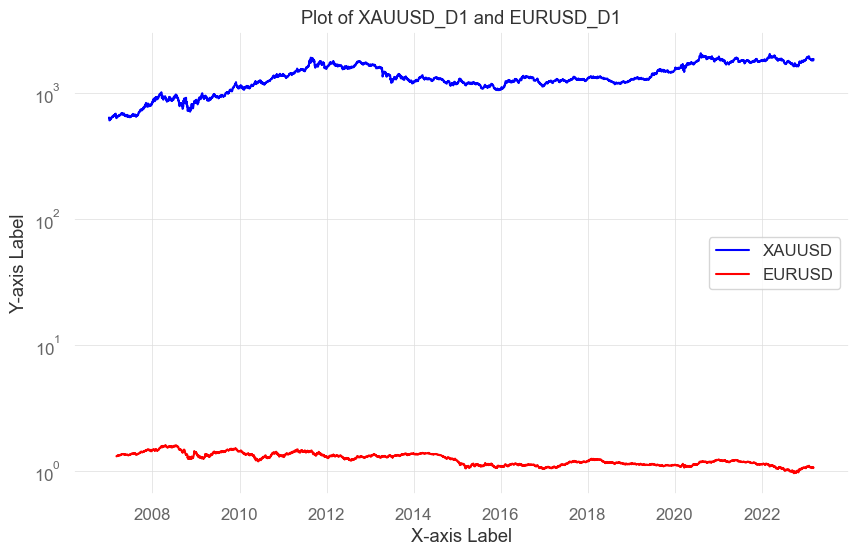

In [9]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label= 'XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [10]:
KF = Kalman_Filter(data_1.loc['2007-03-05':'2023-03-01'],data_2.loc['2007-03-05':'2023-03-01'])

In [11]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.912
Model:                            OLS   Adj. R-squared (uncentered):              0.912
Method:                 Least Squares   F-statistic:                          5.213e+04
Date:                Mon, 04 Mar 2024   Prob (F-statistic):                        0.00
Time:                        01:48:55   Log-Likelihood:                         -37217.
No. Observations:                5004   AIC:                                  7.444e+04
Df Residuals:                    5003   BIC:                                  7.444e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close       1060.9974      4.647    228.322      0.000    1051.887    1070.107
==============================================================================
Omnibus:                      155.460   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.867
Skew:                          -0.268   Prob(JB):                     3.10e-25
Kurtosis:                       2.495   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
result = KF.Run()

In [13]:
KF.print_performance()

----------------------------------------------------------------------------------------------------
PERFORMANCE MEASURES:


Multiple (Strategy):         0.900552
Multiple (Buy-and-Hold):     3.702206
--------------------------------------
Out-/Underperformance:       -2.801654


CAGR:                        -0.00653
Annualized Mean:             -0.006551
Annualized Std:              0.025394
Sharpe Ratio:                -0.257982
Sortino Ratio:               -0.348921
Maximum Drawdown:            0.149154
Calmar Ratio:                -0.043779
Max Drawdown Duration:       5840 Days
Kelly Criterion:             -9.668933


### Save Result Backtest 

In [14]:
result
data = result[['Equity', 'Returns', 'stock1_signal', 'stock2_signal']].copy()

In [15]:
filename = f'{Currency_Pair}_{TF}.csv'

In [16]:
data.to_csv(
    f'../../out/Pairs_Trading/Kalman Filter/Backtest/{filename}', index=True)

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-03-06
End Period                 2023-03-01
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -10.41%
CAGR﹪                     -0.47%

Sharpe                     -0.23
Prob. Sharpe Ratio         15.0%
Smart Sharpe               -0.23
Sortino                    -0.31
Smart Sortino              -0.31
Sortino/√2                 -0.22
Smart Sortino/√2           -0.22
Omega                      0.96

Max Drawdown               -15.11%
Longest DD Days            5727
Volatility (ann.)          2.28%
Calmar                     -0.03
Skew                       -0.67
Kurtosis                   8.55

Expected Daily %           -0.0%
Expected Monthly %         -0.06%
Expected Yearly %          -0.64%
Kelly Criterion            -2.21%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.24%
Expected Shortfall (cVaR)  -0.24%

Max Consecutive

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2007-06-27,2019-06-19,2023-03-01,5727,-15.114645,-14.724628
2,2007-03-14,2007-04-20,2007-06-25,104,-0.487920,-0.487619
3,2007-03-07,2007-03-08,2007-03-12,6,-0.046205,-0.021020


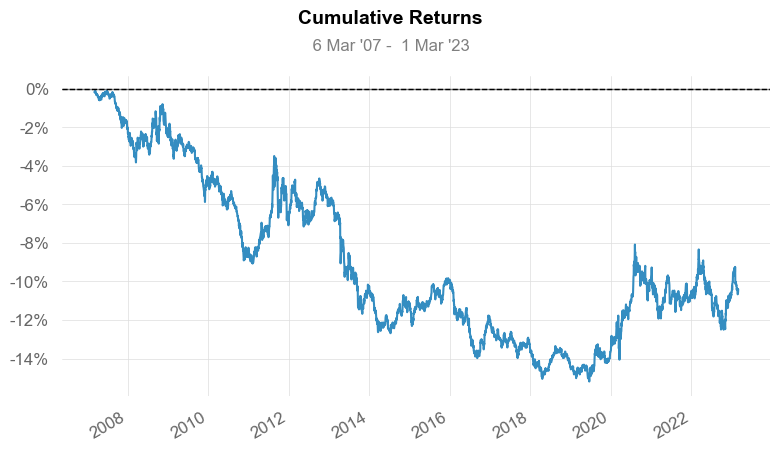

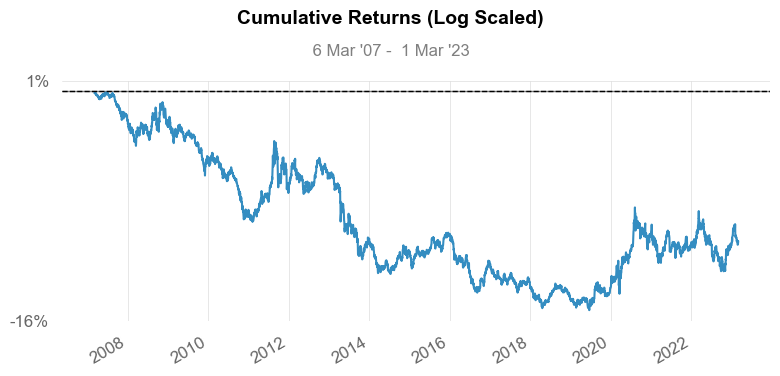

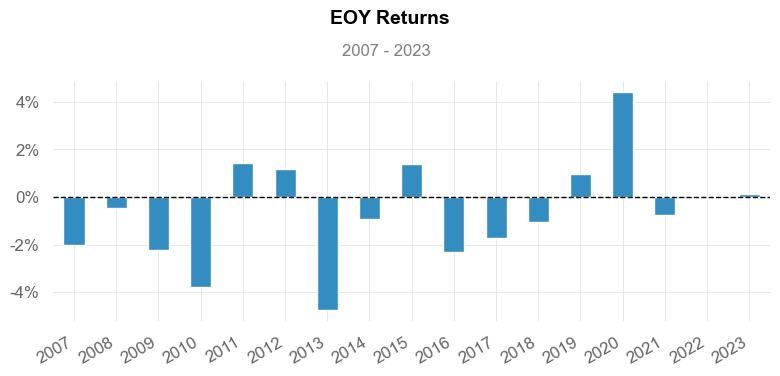

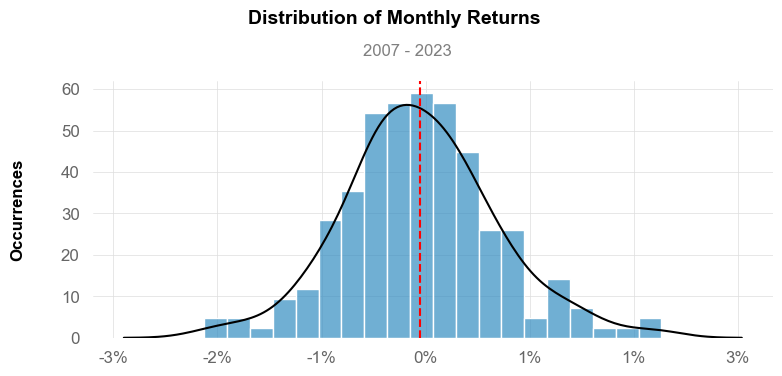

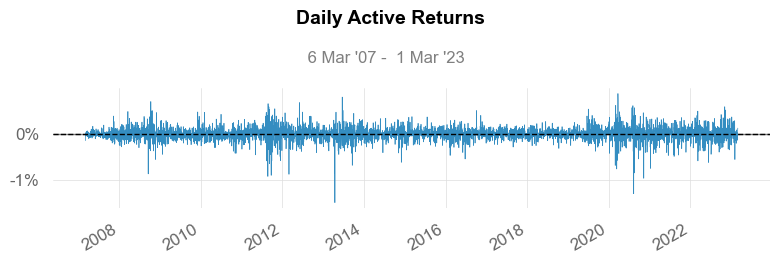

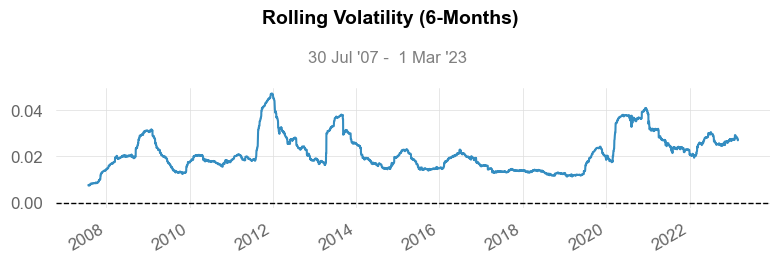

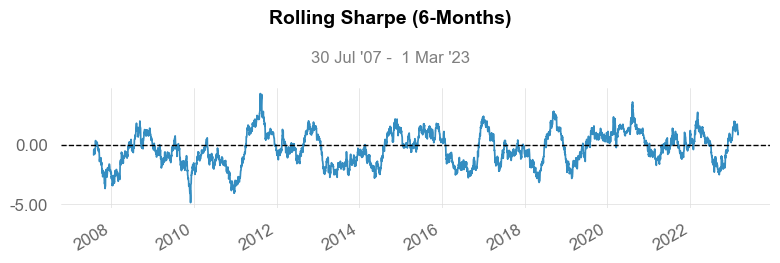

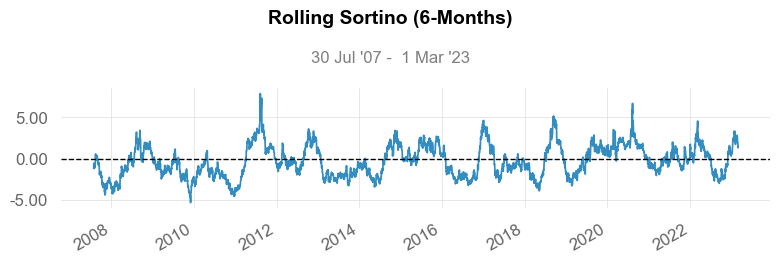

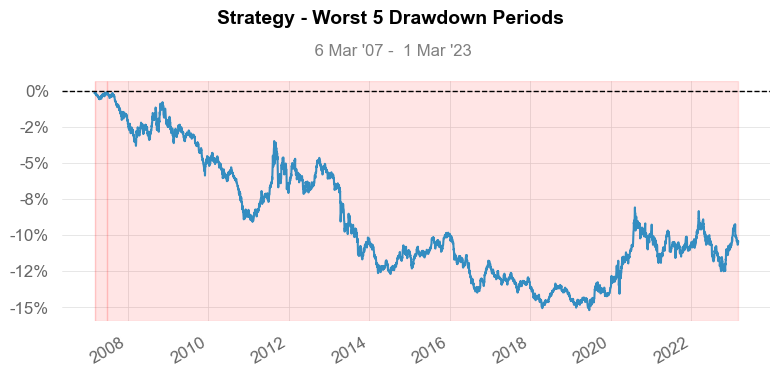

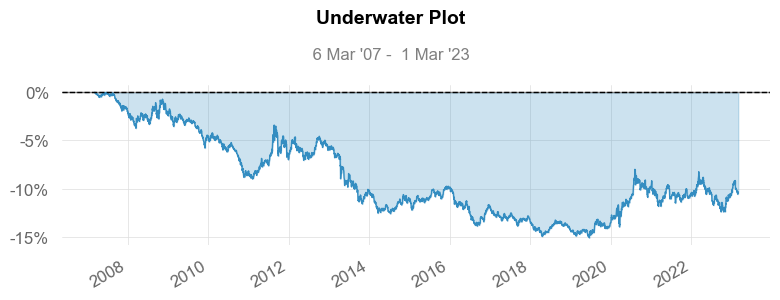

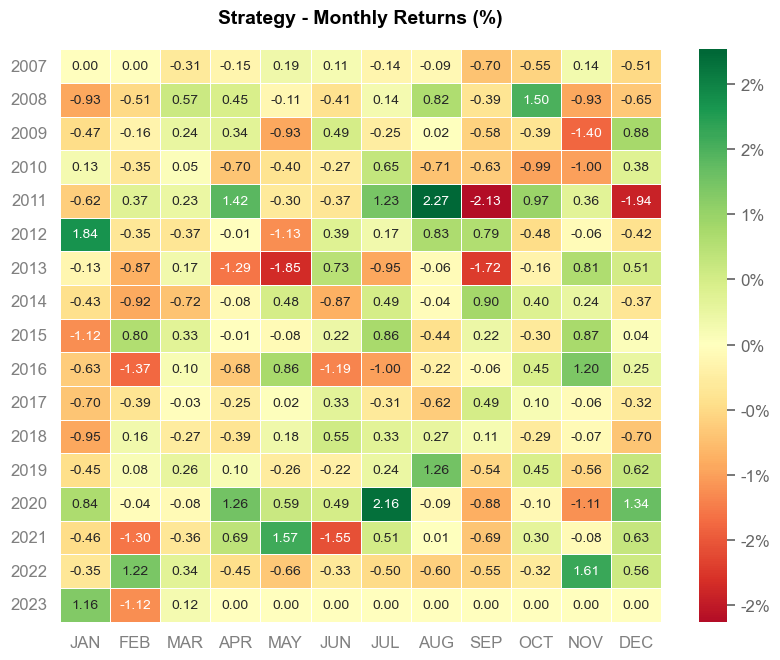

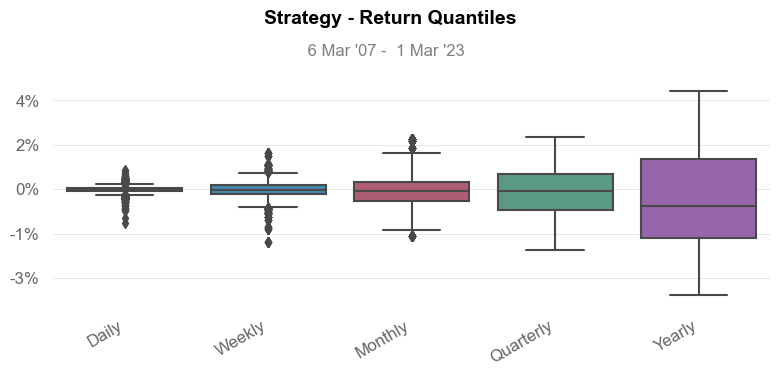

In [17]:
qs.reports.full(result['Equity'].resample('D').last().dropna().pct_change())

## TF H4

In [12]:
TF = 'H4'

In [13]:
data_1 = XAUUSD[TF]

In [14]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

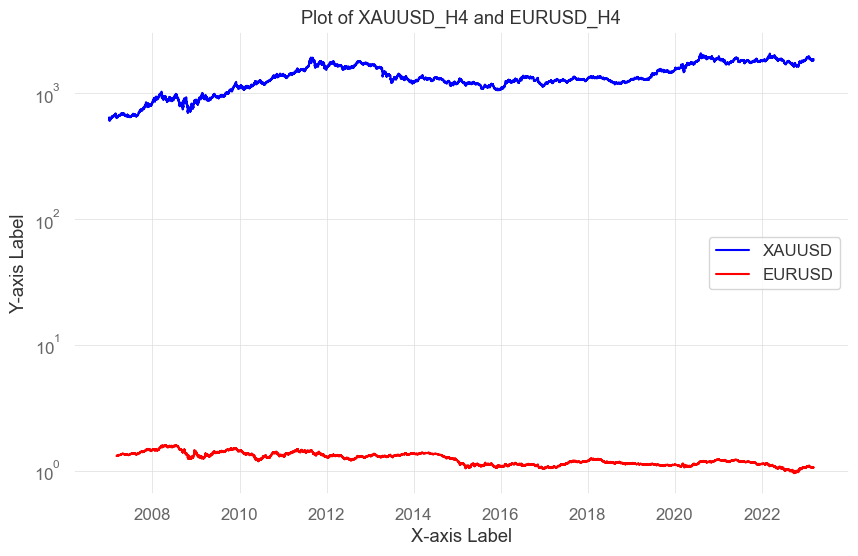

In [21]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label= 'XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [15]:
KF = Kalman_Filter(data_1.loc['2007-03-05':'2023-03-01'],data_2.loc['2007-03-05':'2023-03-01'])

In [16]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.912
Model:                            OLS   Adj. R-squared (uncentered):              0.912
Method:                 Least Squares   F-statistic:                          2.685e+05
Date:                Mon, 04 Mar 2024   Prob (F-statistic):                        0.00
Time:                        02:28:42   Log-Likelihood:                     -1.9193e+05
No. Observations:               25804   AIC:                                  3.839e+05
Df Residuals:                   25803   BIC:                                  3.839e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close       1060.7464      2.047    518.174      0.000    1056.734    1064.759
==============================================================================
Omnibus:                      814.083   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              585.883
Skew:                          -0.268   Prob(JB):                    5.99e-128
Kurtosis:                       2.492   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
result = KF.Run()

In [18]:
KF.print_performance()

----------------------------------------------------------------------------------------------------
PERFORMANCE MEASURES:


Multiple (Strategy):         0.90477
Multiple (Buy-and-Hold):     3.647153
--------------------------------------
Out-/Underperformance:       -2.742383


CAGR:                        -0.006239
Annualized Mean:             -0.006259
Annualized Std:              0.024906
Sharpe Ratio:                -0.2513
Sortino Ratio:               -0.346748
Maximum Drawdown:            0.145849
Calmar Ratio:                -0.04278
Max Drawdown Duration:       5840 Days
Kelly Criterion:             -9.592713


### Save Result Backtest 

In [19]:
result
data = result[['Equity', 'Returns', 'stock1_signal', 'stock2_signal']].copy()

In [20]:
filename = f'{Currency_Pair}_{TF}.csv'

In [21]:
data.to_csv(
    f'../../out/Pairs_Trading/Kalman Filter/Backtest/{filename}', index=True)

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-03-06
End Period                 2023-03-01
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -10.04%
CAGR﹪                     -0.46%

Sharpe                     -0.22
Prob. Sharpe Ratio         15.84%
Smart Sharpe               -0.22
Sortino                    -0.3
Smart Sortino              -0.3
Sortino/√2                 -0.21
Smart Sortino/√2           -0.21
Omega                      0.96

Max Drawdown               -14.75%
Longest DD Days            5727
Volatility (ann.)          2.27%
Calmar                     -0.03
Skew                       -0.66
Kurtosis                   8.6

Expected Daily %           -0.0%
Expected Monthly %         -0.05%
Expected Yearly %          -0.62%
Kelly Criterion            -2.13%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.24%
Expected Shortfall (cVaR)  -0.24%

Max Consecutive W

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2007-06-27,2019-06-19,2023-03-01,5727,-14.745568,-14.106845
2,2007-03-14,2007-04-20,2007-06-25,104,-0.487527,-0.487226
3,2007-03-07,2007-03-08,2007-03-12,6,-0.046168,-0.021003


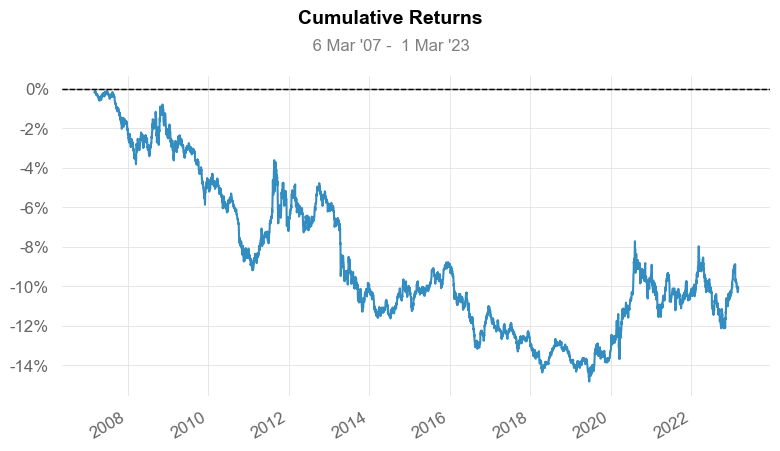

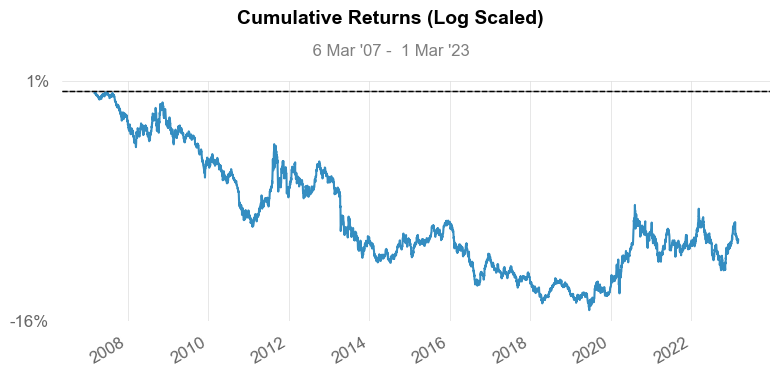

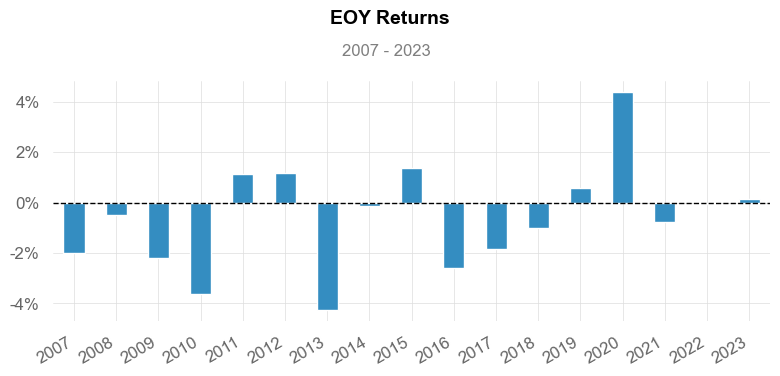

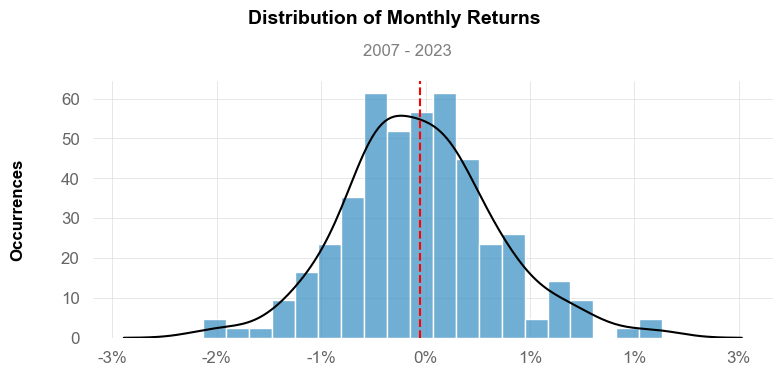

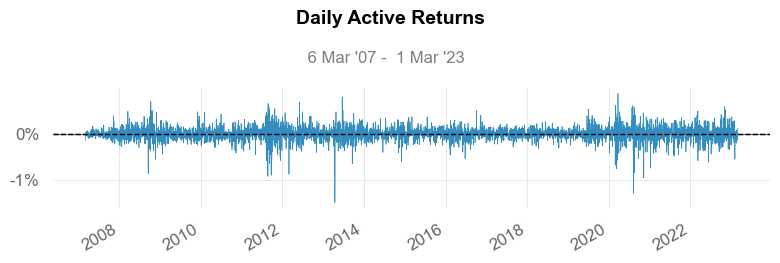

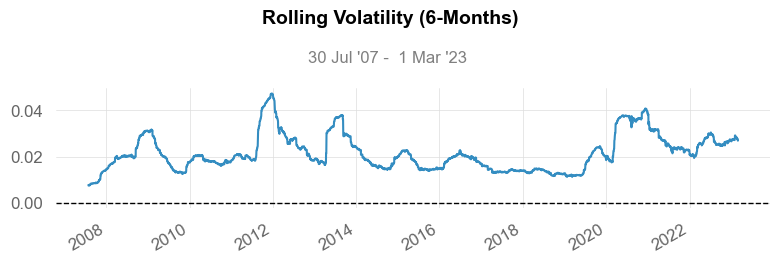

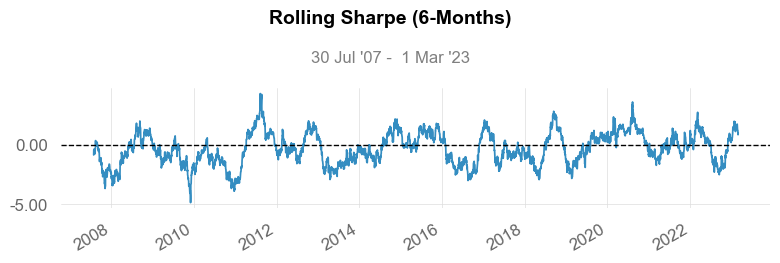

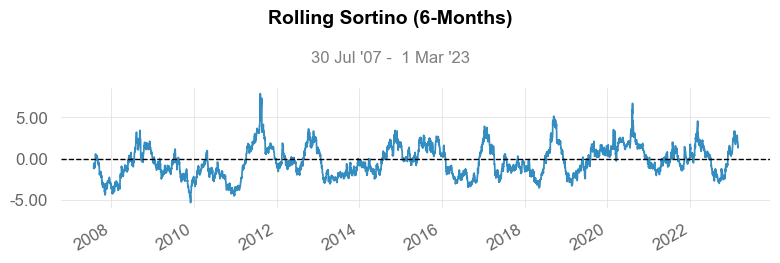

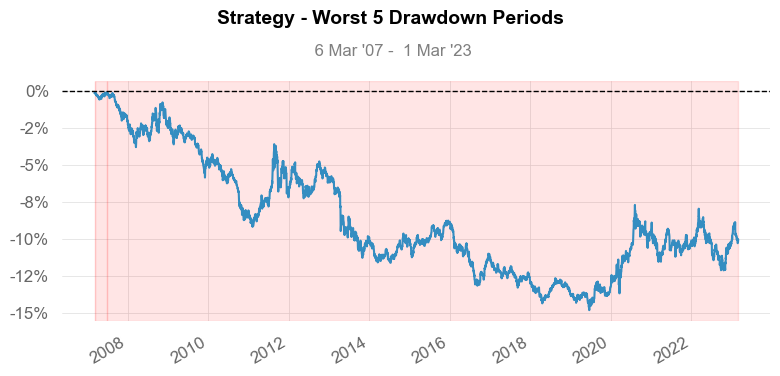

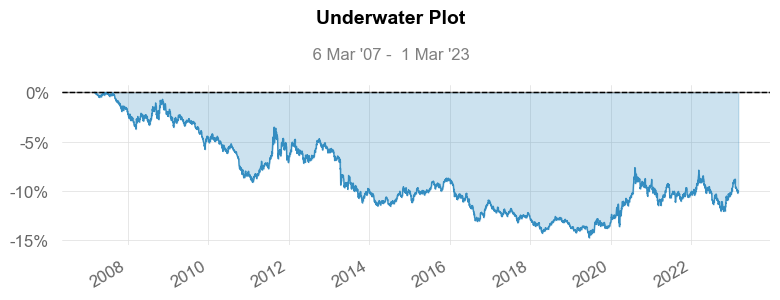

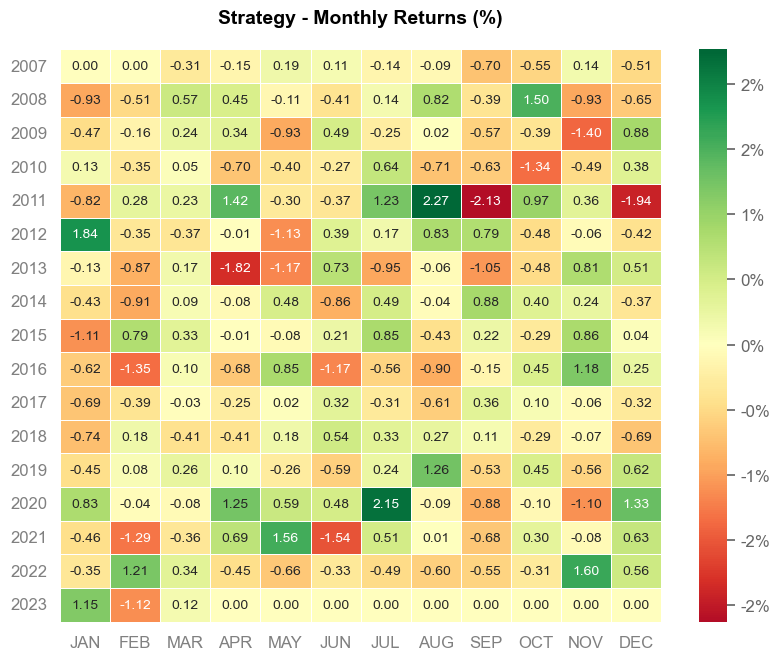

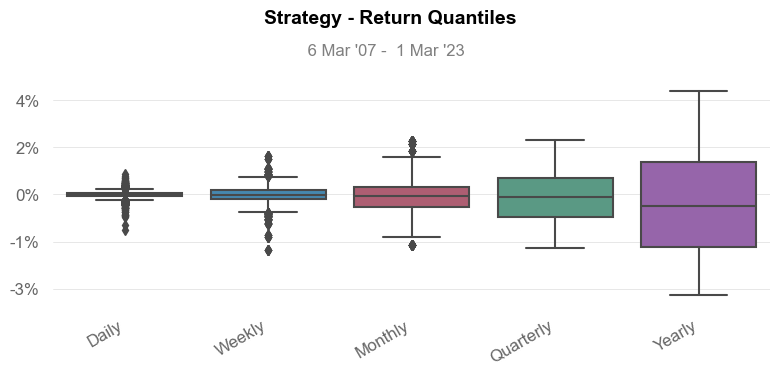

In [22]:
qs.reports.full(result['Equity'].resample('D').last().dropna().pct_change())

## TF H1

In [23]:
TF = 'H1'

In [24]:
data_1 = XAUUSD[TF]

In [25]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

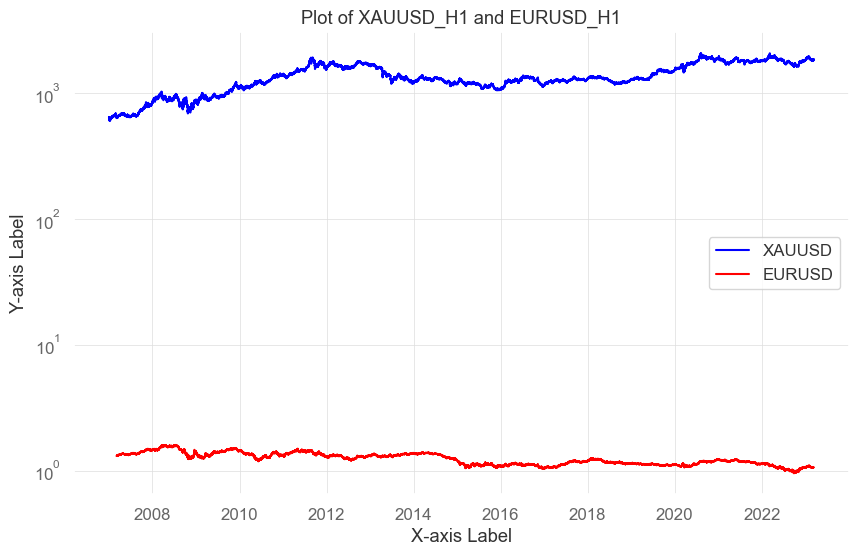

In [26]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label= 'XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [27]:
KF = Kalman_Filter(data_1.loc['2007-03-05':'2023-03-01'],data_2.loc['2007-03-05':'2023-03-01'])

In [28]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.912
Model:                            OLS   Adj. R-squared (uncentered):              0.912
Method:                 Least Squares   F-statistic:                          1.039e+06
Date:                Mon, 04 Mar 2024   Prob (F-statistic):                        0.00
Time:                        02:32:50   Log-Likelihood:                     -7.4267e+05
No. Observations:               99848   AIC:                                  1.485e+06
Df Residuals:                   99847   BIC:                                  1.485e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close       1060.6817      1.041   1019.207      0.000    1058.642    1062.721
==============================================================================
Omnibus:                     3156.922   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2268.535
Skew:                          -0.268   Prob(JB):                         0.00
Kurtosis:                       2.492   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
result = KF.Run()

### Save Result Backtest 

In [30]:
result
data = result[['Equity', 'Returns', 'stock1_signal', 'stock2_signal']].copy()

In [31]:
filename = f'{Currency_Pair}_{TF}.csv'

In [32]:
data.to_csv(
    f'../../out/Pairs_Trading/Kalman Filter/Backtest/{filename}', index=True)

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-03-06
End Period                 2023-03-01
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -9.84%
CAGR﹪                     -0.45%

Sharpe                     -0.22
Prob. Sharpe Ratio         16.37%
Smart Sharpe               -0.22
Sortino                    -0.3
Smart Sortino              -0.3
Sortino/√2                 -0.21
Smart Sortino/√2           -0.21
Omega                      0.96

Max Drawdown               -14.54%
Longest DD Days            5727
Volatility (ann.)          2.27%
Calmar                     -0.03
Skew                       -0.69
Kurtosis                   9.07

Expected Daily %           -0.0%
Expected Monthly %         -0.05%
Expected Yearly %          -0.61%
Kelly Criterion            -2.09%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.24%
Expected Shortfall (cVaR)  -0.24%

Max Consecutive W

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2007-06-27,2019-06-19,2023-03-01,5727,-14.543596,-13.921260
2,2007-03-14,2007-04-20,2007-06-25,104,-0.487742,-0.487441
3,2007-03-07,2007-03-08,2007-03-12,6,-0.046188,-0.021012


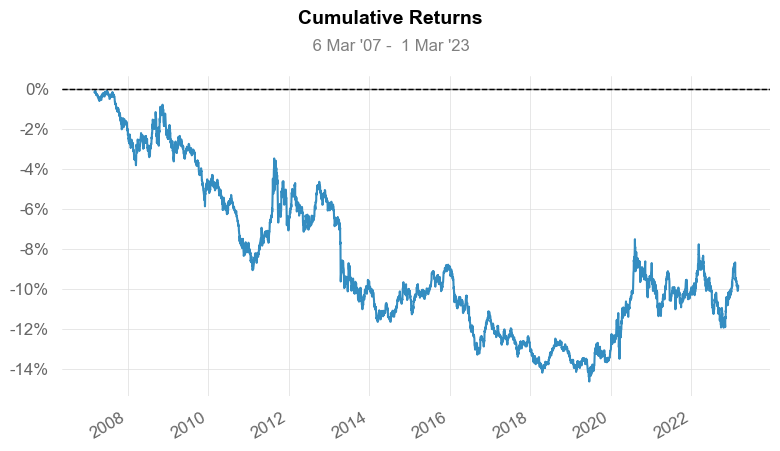

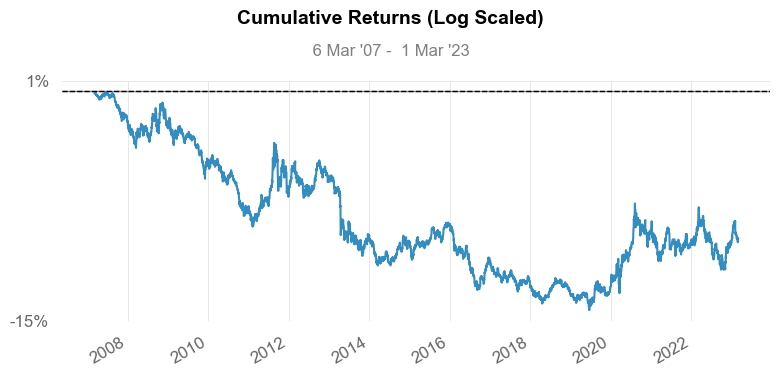

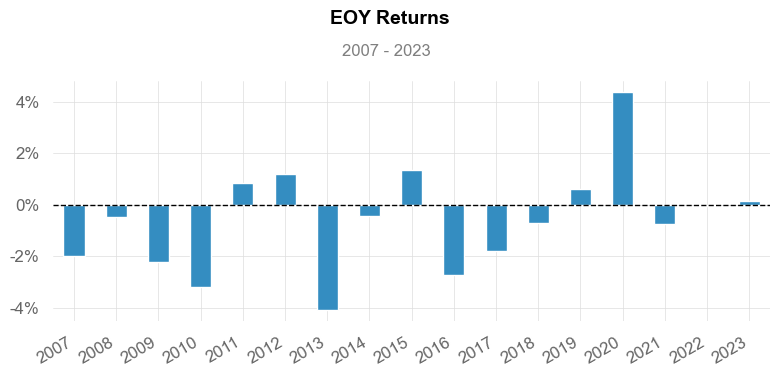

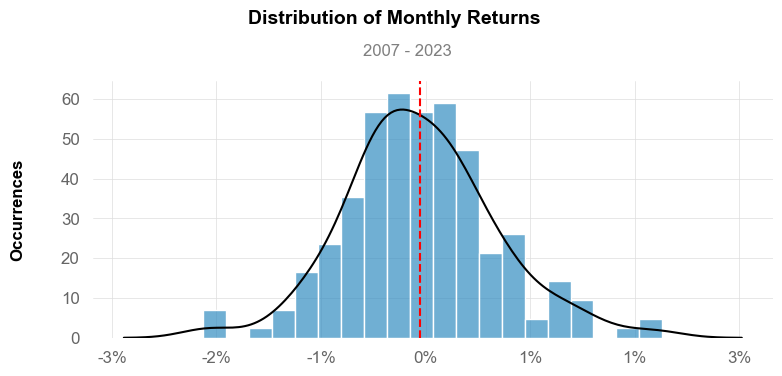

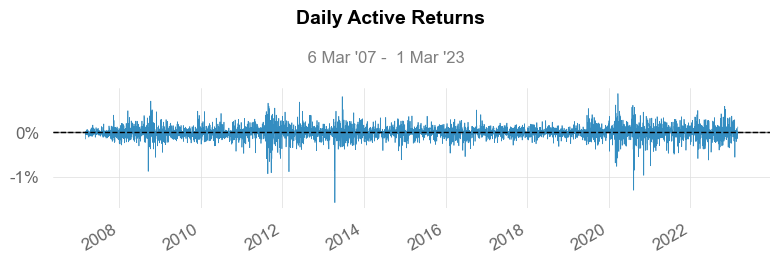

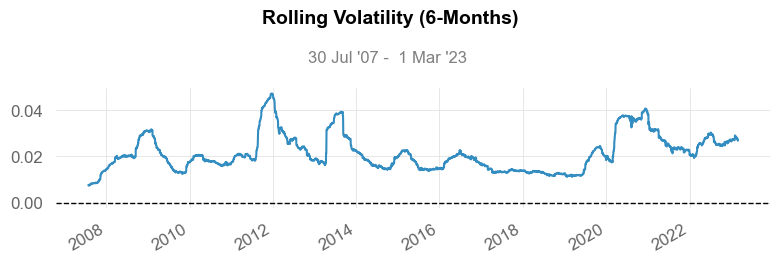

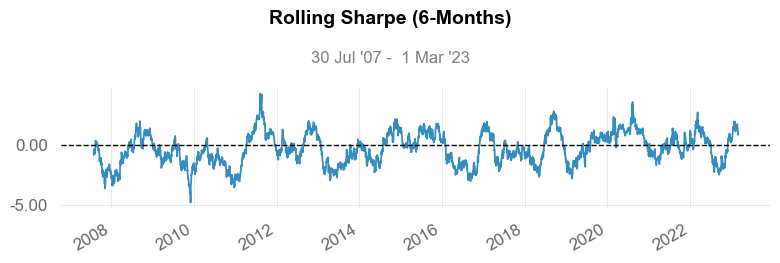

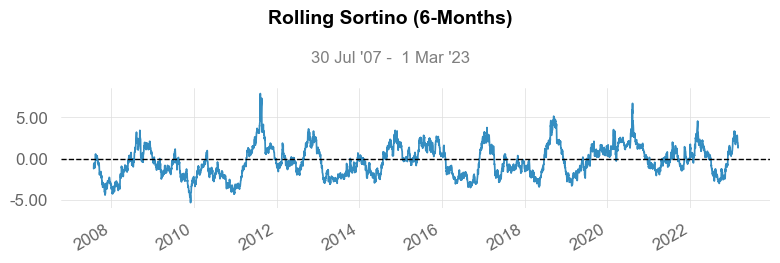

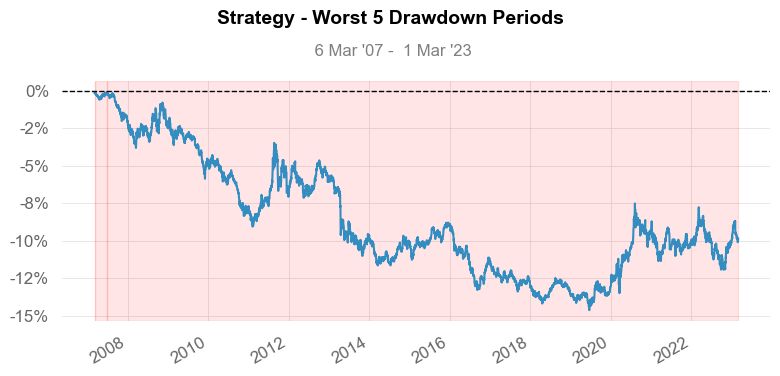

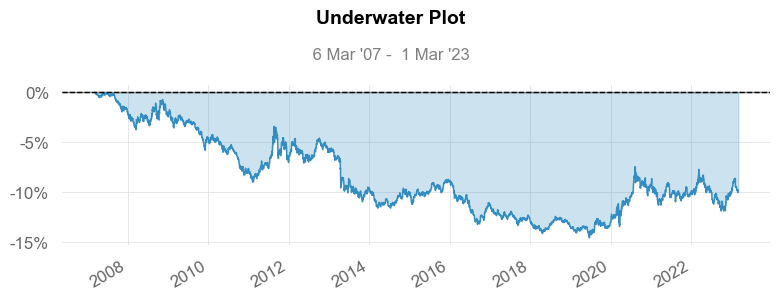

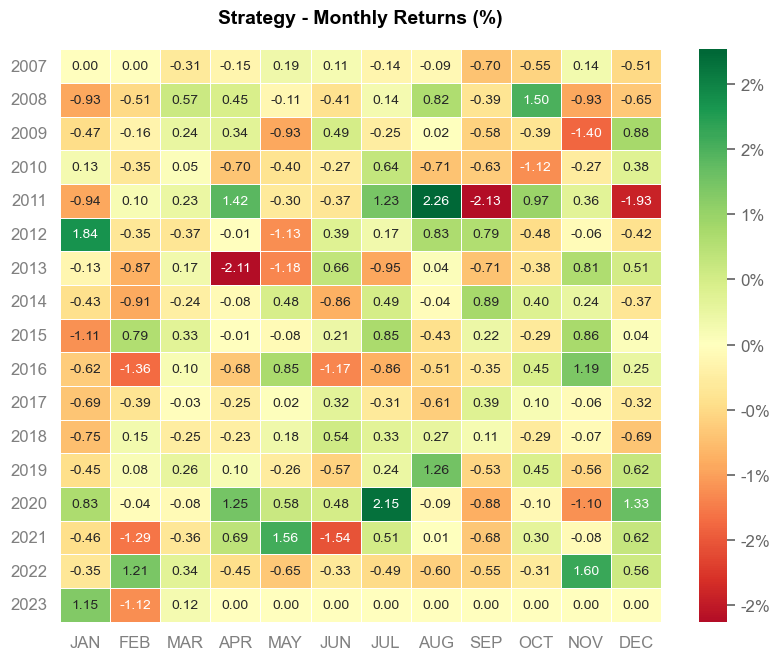

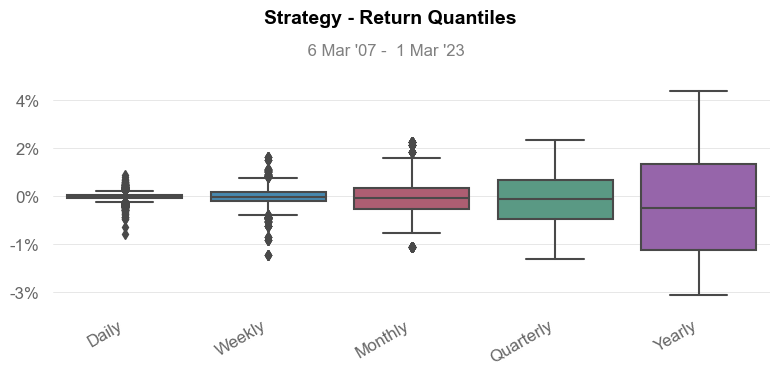

In [33]:
qs.reports.full(result['Equity'].resample('D').last().dropna().pct_change().resample('D').last().dropna())

## TF H30

In [34]:
TF = 'M30'

In [35]:
data_1 = XAUUSD[TF]

In [36]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

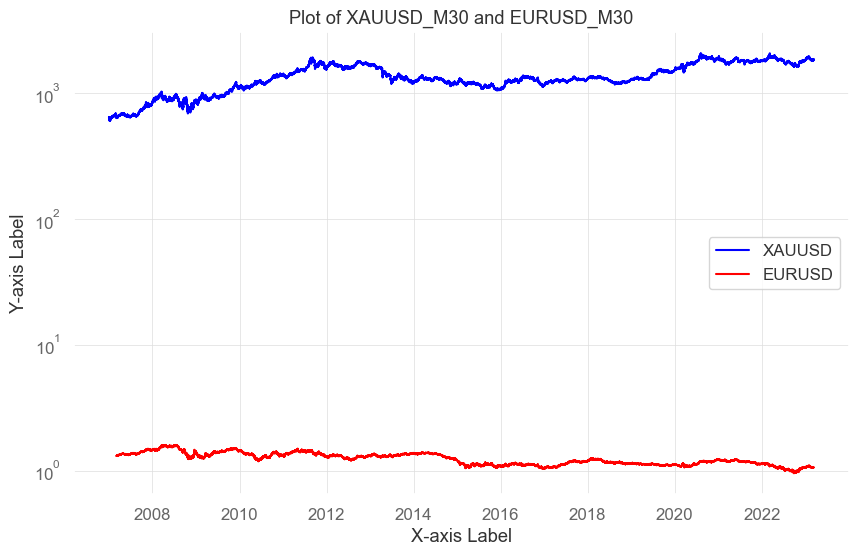

In [37]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label= 'XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [38]:
KF = Kalman_Filter(data_1.loc['2007-03-05':'2023-03-01'],data_2.loc['2007-03-05':'2023-03-01'])

In [39]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.912
Model:                            OLS   Adj. R-squared (uncentered):              0.912
Method:                 Least Squares   F-statistic:                          2.077e+06
Date:                Mon, 04 Mar 2024   Prob (F-statistic):                        0.00
Time:                        02:44:12   Log-Likelihood:                     -1.4852e+06
No. Observations:              199678   AIC:                                  2.970e+06
Df Residuals:                  199677   BIC:                                  2.970e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close       1060.6714      0.736   1441.290      0.000    1059.229    1062.114
==============================================================================
Omnibus:                     6316.512   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4537.871
Skew:                          -0.268   Prob(JB):                         0.00
Kurtosis:                       2.492   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
result = KF.Run()

### Save Result Backtest 

In [41]:
result
data = result[['Equity', 'Returns', 'stock1_signal', 'stock2_signal']].copy()

In [42]:
filename = f'{Currency_Pair}_{TF}.csv'

In [43]:
data.to_csv(
    f'../../out/Pairs_Trading/Kalman Filter/Backtest/{filename}', index=True)

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-03-06
End Period                 2023-03-01
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -10.37%
CAGR﹪                     -0.47%

Sharpe                     -0.23
Prob. Sharpe Ratio         15.11%
Smart Sharpe               -0.23
Sortino                    -0.31
Smart Sortino              -0.31
Sortino/√2                 -0.22
Smart Sortino/√2           -0.22
Omega                      0.96

Max Drawdown               -15.07%
Longest DD Days            5727
Volatility (ann.)          2.28%
Calmar                     -0.03
Skew                       -0.78
Kurtosis                   10.45

Expected Daily %           -0.0%
Expected Monthly %         -0.06%
Expected Yearly %          -0.64%
Kelly Criterion            -2.2%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.24%
Expected Shortfall (cVaR)  -0.24%

Max Consecutiv

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2007-06-27,2019-06-19,2023-03-01,5727,-15.072980,-14.489987
2,2007-03-14,2007-04-20,2007-06-25,104,-0.487651,-0.487350
3,2007-03-07,2007-03-08,2007-03-12,6,-0.046179,-0.021008


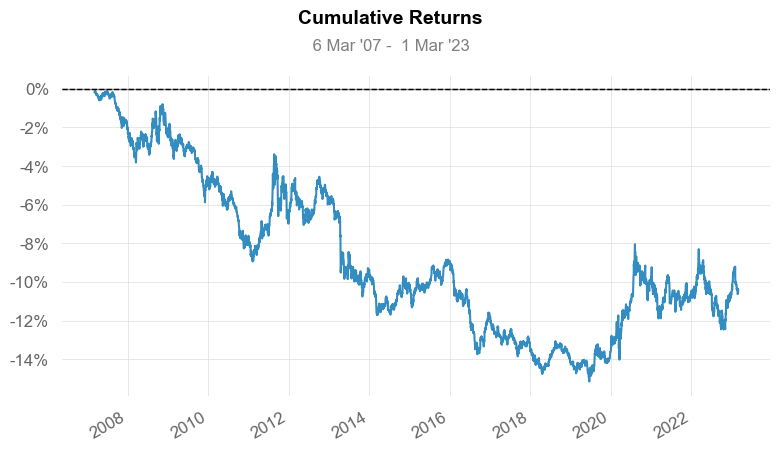

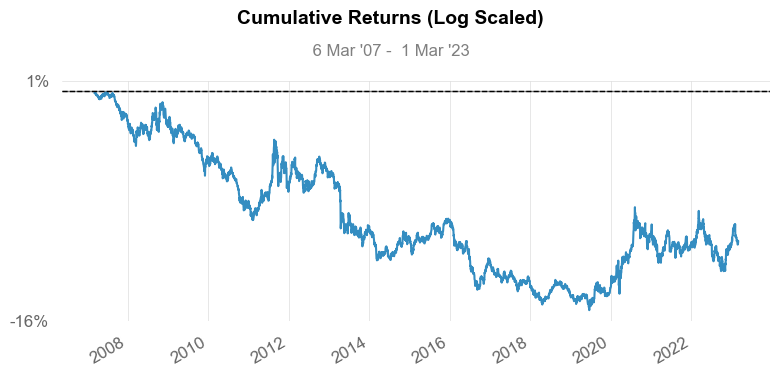

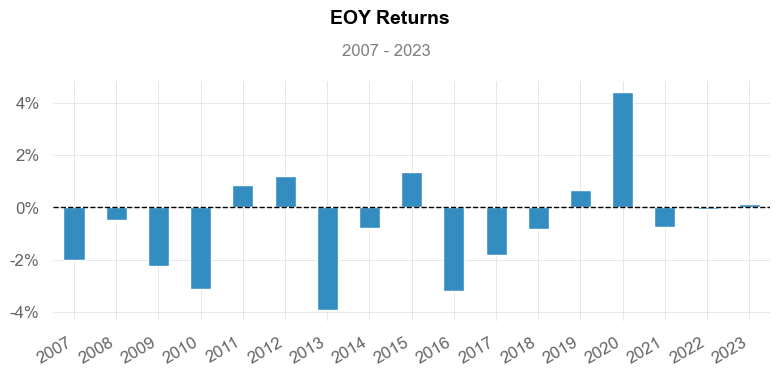

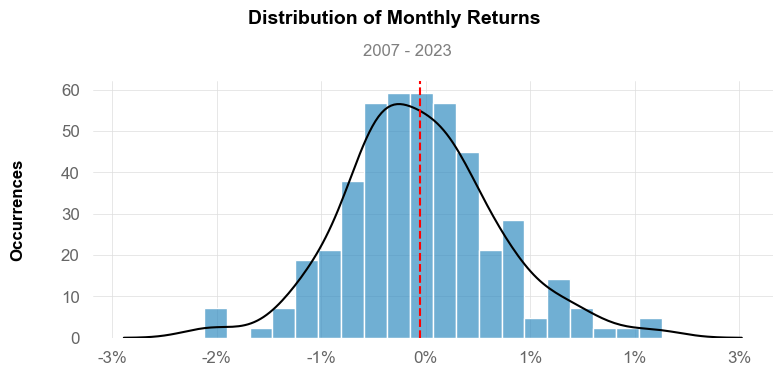

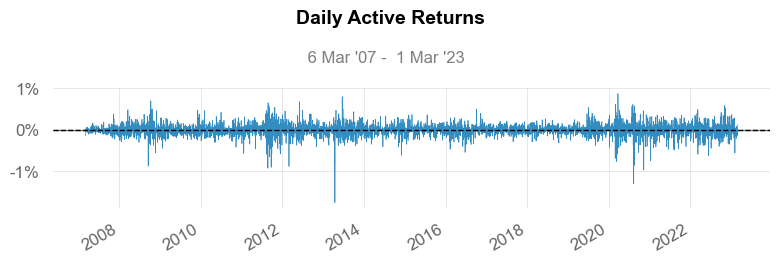

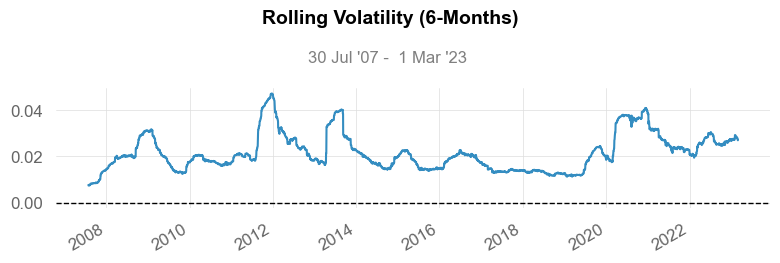

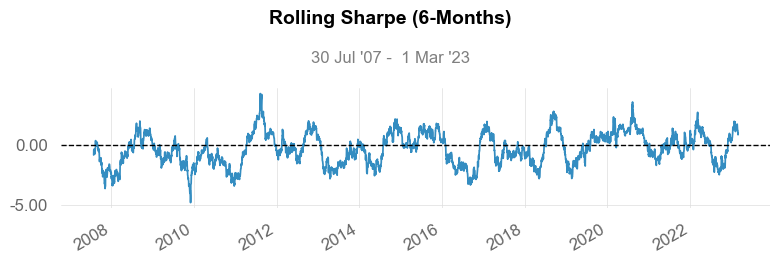

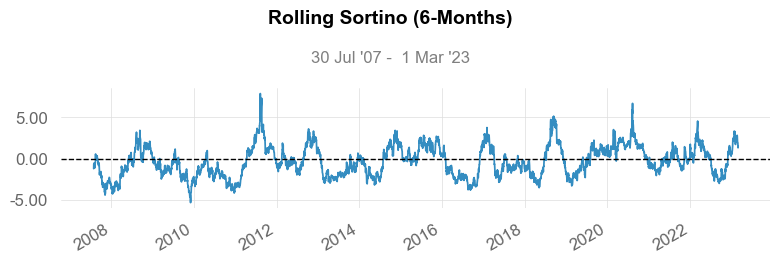

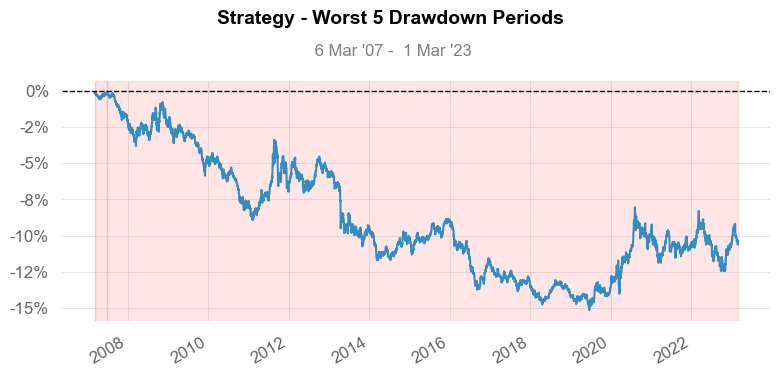

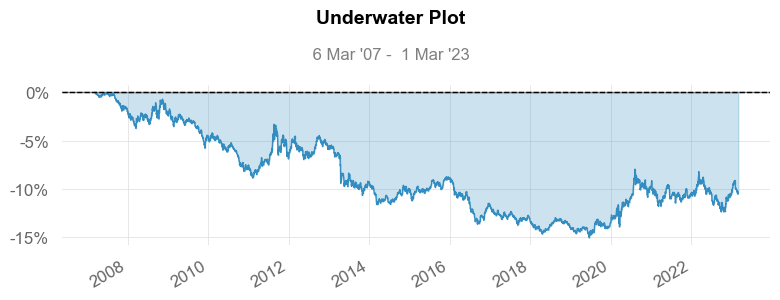

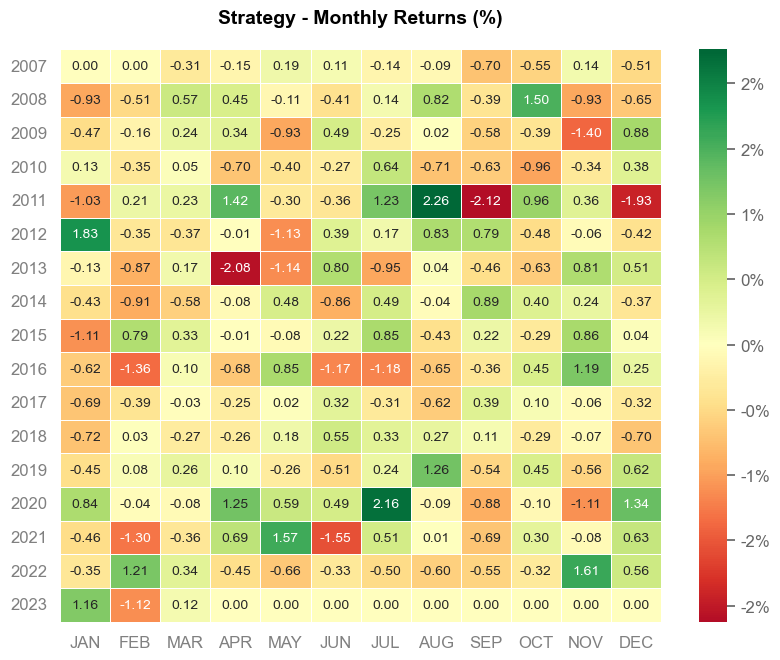

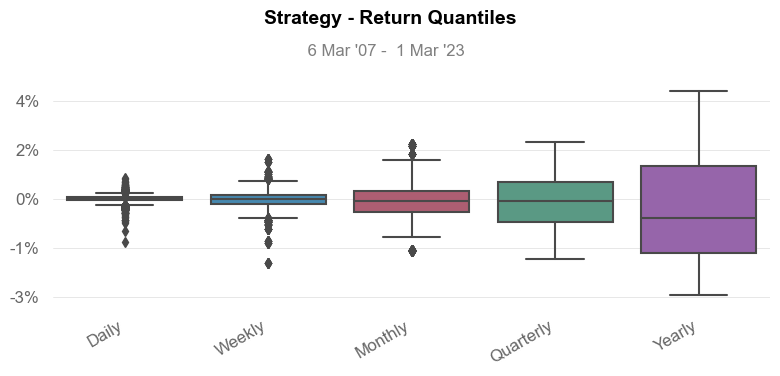

In [44]:
qs.reports.full(result['Equity'].resample('D').last().dropna().pct_change().resample('D').last().dropna())